In [63]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import datetime

import sys
sys.path.insert(1, '../src/')

from SEIR_exams import *
from SEIR import *


In [2]:
df = pd.read_csv ("../data/COVID_Chile_Regiones.csv")
df = df.dropna(subset = ["Region"])
df["Fecha_dt"] = pd.to_datetime (df["Fecha"])
df["Fecha_dt"][df["Fecha_dt"] >= '2020-03-18'] -=  pd.Timedelta(hours=12)

df = df.groupby("Fecha_dt", as_index=False).sum()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [3]:
a = 0.45
k = 0.2
a_date = 19.3
ts = np.arange (0, 100, 1)

alphas = 1 + (a-1)/(1+np.exp(-k*(ts-a_date)))


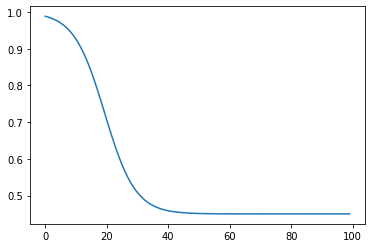

In [4]:
plt.plot (alphas)

In [5]:
beta = 1e-07
sigma = 1/14.5 
gamma = 1./12.0

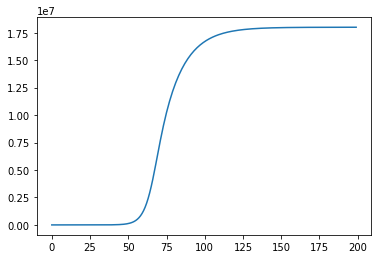

In [6]:
pop = 1.8e7
i0 = 1
e0 = 0
r0 = 0
s0 = pop - i0 - r0 - e0

ts = np.arange (0, 200, 1)
s_c, e_c, i_c, r_c = SEIR_forward(ts, s0, e0, i0, r0, beta, sigma, gamma)

plt.plot (ts, i_c+r_c)


In [7]:
S_c, E_c, I_c, R_c, I_m, R_m = SEIR_exams (ts, s0, e0, i0, r0, beta, sigma, gamma, a_date, k, a)


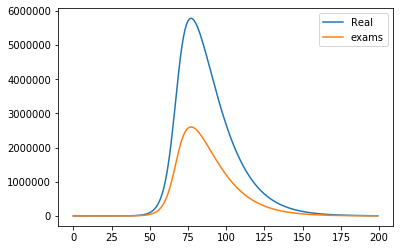

In [8]:
plt.plot(I_c, label = "Real")
plt.plot (I_m, label = "exams")
plt.legend()

In [9]:
t_data = np.arange(len(df.Infectados_Actuales))
I_real = df.Infectados_Actuales.values
R_real = df.Recuperados.values



In [10]:
RMSE, beta, sigma, gamma, a_date, k, a = GridSearchSEIR_exams (t_data, s0, e0, i0, r0, I_real, R_real)

36 36
beta =  1e-09 1.9073486328125e-06
min =  [2362.82021881485, 1e-09, 0.2, 0.2, 0.0, 0.001, 0.25]
min =  [2362.8201404983297, 1e-09, 0.2, 0.2, 4.375, 0.001, 0.25]
min =  [2362.820062177783, 1e-09, 0.2, 0.2, 8.75, 0.001, 0.25]
min =  [2362.819983853957, 1e-09, 0.2, 0.2, 13.125, 0.001, 0.25]
min =  [2362.8199055276036, 1e-09, 0.2, 0.2, 17.5, 0.001, 0.25]
min =  [2362.819827199471, 1e-09, 0.2, 0.2, 21.875, 0.001, 0.25]
min =  [2362.819748870309, 1e-09, 0.2, 0.2, 26.25, 0.001, 0.25]
min =  [2362.8196705408677, 1e-09, 0.2, 0.2, 30.625, 0.001, 0.25]
min =  [2362.8195922118957, 1e-09, 0.2, 0.2, 35.0, 0.001, 0.25]
min =  [2362.817188590978, 1e-09, 0.2, 0.2, 0.0, 0.001, 0.3125]
min =  [2362.81711682066, 1e-09, 0.2, 0.2, 4.375, 0.001, 0.3125]
min =  [2362.8170450466087, 1e-09, 0.2, 0.2, 8.75, 0.001, 0.3125]
min =  [2362.8169732695096, 1e-09, 0.2, 0.2, 13.125, 0.001, 0.3125]
min =  [2362.8169014900504, 1e-09, 0.2, 0.2, 17.5, 0.001, 0.3125]
min =  [2362.816829708918, 1e-09, 0.2, 0.2, 21.875, 0.

min =  [2362.786267436054, 1e-09, 0.2, 0.16666666666666666, 35.0, 0.01778279410038923, 0.75]
min =  [2362.785882883996, 1e-09, 0.2, 0.16666666666666666, 35.0, 0.03162277660168379, 0.75]
min =  [2362.785228684424, 1e-09, 0.2, 0.16666666666666666, 35.0, 0.05623413251903491, 0.75]
min =  [2362.784188745632, 1e-09, 0.2, 0.16666666666666666, 35.0, 0.1, 0.75]
min =  [2362.782280545691, 1e-09, 0.2, 0.14285714285714285, 0.0, 0.001, 0.625]
min =  [2362.7822314387286, 1e-09, 0.2, 0.14285714285714285, 4.375, 0.001, 0.625]
min =  [2362.782182329128, 1e-09, 0.2, 0.14285714285714285, 8.75, 0.001, 0.625]
min =  [2362.7821332173567, 1e-09, 0.2, 0.14285714285714285, 13.125, 0.001, 0.625]
min =  [2362.7820841038865, 1e-09, 0.2, 0.14285714285714285, 17.5, 0.001, 0.625]
min =  [2362.7820349891867, 1e-09, 0.2, 0.14285714285714285, 21.875, 0.001, 0.625]
min =  [2362.781985873727, 1e-09, 0.2, 0.14285714285714285, 26.25, 0.001, 0.625]
min =  [2362.781936757978, 1e-09, 0.2, 0.14285714285714285, 30.625, 0.001, 

min =  [2362.739958545556, 1e-09, 0.2, 0.1111111111111111, 35.0, 0.03162277660168379, 0.75]
min =  [2362.7387297316045, 1e-09, 0.2, 0.1111111111111111, 35.0, 0.05623413251903491, 0.75]
min =  [2362.736815788998, 1e-09, 0.2, 0.1111111111111111, 35.0, 0.1, 0.75]
min =  [2362.7339969065856, 1e-09, 0.2, 0.1, 0.0, 0.001, 0.625]
min =  [2362.7339233432062, 1e-09, 0.2, 0.1, 4.375, 0.001, 0.625]
min =  [2362.733849775943, 1e-09, 0.2, 0.1, 8.75, 0.001, 0.625]
min =  [2362.7337762054995, 1e-09, 0.2, 0.1, 13.125, 0.001, 0.625]
min =  [2362.733702632581, 1e-09, 0.2, 0.1, 17.5, 0.001, 0.625]
min =  [2362.733629057889, 1e-09, 0.2, 0.1, 21.875, 0.001, 0.625]
min =  [2362.73355548213, 1e-09, 0.2, 0.1, 26.25, 0.001, 0.625]
min =  [2362.733481906007, 1e-09, 0.2, 0.1, 30.625, 0.001, 0.625]
min =  [2362.7334083302244, 1e-09, 0.2, 0.1, 35.0, 0.001, 0.625]
min =  [2362.7283092598527, 1e-09, 0.2, 0.1, 0.0, 0.001, 0.6875]
min =  [2362.7282479651435, 1e-09, 0.2, 0.1, 4.375, 0.001, 0.6875]
min =  [2362.72818666

min =  [2362.6558344255136, 1e-09, 0.2, 0.07692307692307693, 35.0, 0.03162277660168379, 0.75]
min =  [2362.653669133763, 1e-09, 0.2, 0.07692307692307693, 35.0, 0.05623413251903491, 0.75]
min =  [2362.650296609682, 1e-09, 0.2, 0.07692307692307693, 35.0, 0.1, 0.75]
min =  [2362.6463354336743, 1e-09, 0.2, 0.07142857142857142, 0.0, 0.001, 0.6875]
min =  [2362.6462408407597, 1e-09, 0.2, 0.07142857142857142, 4.375, 0.001, 0.6875]
min =  [2362.6461462428433, 1e-09, 0.2, 0.07142857142857142, 8.75, 0.001, 0.6875]
min =  [2362.6460516408297, 1e-09, 0.2, 0.07142857142857142, 13.125, 0.001, 0.6875]
min =  [2362.645957035624, 1e-09, 0.2, 0.07142857142857142, 17.5, 0.001, 0.6875]
min =  [2362.645862428131, 1e-09, 0.2, 0.07142857142857142, 21.875, 0.001, 0.6875]
min =  [2362.645767819256, 1e-09, 0.2, 0.07142857142857142, 26.25, 0.001, 0.6875]
min =  [2362.6456732099055, 1e-09, 0.2, 0.07142857142857142, 30.625, 0.001, 0.6875]
min =  [2362.6455786009838, 1e-09, 0.2, 0.07142857142857142, 35.0, 0.001, 0.

min =  [2362.5332938458746, 1e-09, 0.2, 0.05263157894736842, 26.25, 0.001, 0.75]
min =  [2362.533185709354, 1e-09, 0.2, 0.05263157894736842, 30.625, 0.001, 0.75]
min =  [2362.5330775732887, 1e-09, 0.2, 0.05263157894736842, 35.0, 0.001, 0.75]
min =  [2362.5329600951763, 1e-09, 0.2, 0.05263157894736842, 35.0, 0.0017782794100389228, 0.75]
min =  [2362.5327512217273, 1e-09, 0.2, 0.05263157894736842, 35.0, 0.0031622776601683794, 0.75]
min =  [2362.532379981883, 1e-09, 0.2, 0.05263157894736842, 35.0, 0.005623413251903491, 0.75]
min =  [2362.531720897857, 1e-09, 0.2, 0.05263157894736842, 35.0, 0.01, 0.75]
min =  [2362.530554859831, 1e-09, 0.2, 0.05263157894736842, 35.0, 0.01778279410038923, 0.75]
min =  [2362.52851388758, 1e-09, 0.2, 0.05263157894736842, 35.0, 0.03162277660168379, 0.75]
min =  [2362.5250512058446, 1e-09, 0.2, 0.05263157894736842, 35.0, 0.05623413251903491, 0.75]
min =  [2362.5196287475287, 1e-09, 0.2, 0.05263157894736842, 35.0, 0.1, 0.75]
min =  [2362.5148015403133, 1e-09, 0.

min =  [2362.1201948326, 1e-08, 0.2, 0.16666666666666666, 35.0, 0.0031622776601683794, 0.75]
min =  [2362.119552138694, 1e-08, 0.2, 0.16666666666666666, 35.0, 0.005623413251903491, 0.75]
min =  [2362.1184106931373, 1e-08, 0.2, 0.16666666666666666, 35.0, 0.01, 0.75]
min =  [2362.1163888390615, 1e-08, 0.2, 0.16666666666666666, 35.0, 0.01778279410038923, 0.75]
min =  [2362.112836693105, 1e-08, 0.2, 0.16666666666666666, 35.0, 0.03162277660168379, 0.75]
min =  [2362.1067443057973, 1e-08, 0.2, 0.16666666666666666, 35.0, 0.05623413251903491, 0.75]
min =  [2362.096933776417, 1e-08, 0.2, 0.16666666666666666, 35.0, 0.1, 0.75]
min =  [2362.0813827512347, 1e-08, 0.2, 0.14285714285714285, 0.0, 0.001, 0.3125]
min =  [2362.080462278843, 1e-08, 0.2, 0.14285714285714285, 4.375, 0.001, 0.3125]
min =  [2362.079541757091, 1e-08, 0.2, 0.14285714285714285, 8.75, 0.001, 0.3125]
min =  [2362.0786211947857, 1e-08, 0.2, 0.14285714285714285, 13.125, 0.001, 0.3125]
min =  [2362.0777006007343, 1e-08, 0.2, 0.142857

min =  [2361.4506296551103, 1e-08, 0.2, 0.125, 35.0, 0.01778279410038923, 0.75]
min =  [2361.444104030929, 1e-08, 0.2, 0.125, 35.0, 0.03162277660168379, 0.75]
min =  [2361.4328861400604, 1e-08, 0.2, 0.125, 35.0, 0.05623413251903491, 0.75]
min =  [2361.414724446611, 1e-08, 0.2, 0.125, 35.0, 0.1, 0.75]
min =  [2361.413656850762, 1e-08, 0.2, 0.1111111111111111, 17.5, 0.001, 0.4375]
min =  [2361.4124001884898, 1e-08, 0.2, 0.1111111111111111, 21.875, 0.001, 0.4375]
min =  [2361.4111435050077, 1e-08, 0.2, 0.1111111111111111, 26.25, 0.001, 0.4375]
min =  [2361.409886812342, 1e-08, 0.2, 0.1111111111111111, 30.625, 0.001, 0.4375]
min =  [2361.4086301225193, 1e-08, 0.2, 0.1111111111111111, 35.0, 0.001, 0.4375]
min =  [2361.353884695095, 1e-08, 0.2, 0.1111111111111111, 0.0, 0.001, 0.5]
min =  [2361.3527679371964, 1e-08, 0.2, 0.1111111111111111, 4.375, 0.001, 0.5]
min =  [2361.3516511174994, 1e-08, 0.2, 0.1111111111111111, 8.75, 0.001, 0.5]
min =  [2361.3505342466874, 1e-08, 0.2, 0.111111111111111

min =  [2360.3367374036466, 1e-08, 0.2, 0.09090909090909091, 26.25, 0.001, 0.75]
min =  [2360.3359432283596, 1e-08, 0.2, 0.09090909090909091, 30.625, 0.001, 0.75]
min =  [2360.335149053803, 1e-08, 0.2, 0.09090909090909091, 35.0, 0.001, 0.75]
min =  [2360.3345058770255, 1e-08, 0.2, 0.09090909090909091, 35.0, 0.0017782794100389228, 0.75]
min =  [2360.333362255958, 1e-08, 0.2, 0.09090909090909091, 35.0, 0.0031622776601683794, 0.75]
min =  [2360.331329279511, 1e-08, 0.2, 0.09090909090909091, 35.0, 0.005623413251903491, 0.75]
min =  [2360.3277179760353, 1e-08, 0.2, 0.09090909090909091, 35.0, 0.01, 0.75]
min =  [2360.321317701369, 1e-08, 0.2, 0.09090909090909091, 35.0, 0.01778279410038923, 0.75]
min =  [2360.310054764972, 1e-08, 0.2, 0.09090909090909091, 35.0, 0.03162277660168379, 0.75]
min =  [2360.290648110126, 1e-08, 0.2, 0.09090909090909091, 35.0, 0.05623413251903491, 0.75]
min =  [2360.2590466137194, 1e-08, 0.2, 0.09090909090909091, 35.0, 0.1, 0.75]
min =  [2360.180932909064, 1e-08, 0.2

min =  [2359.210956912655, 1e-08, 0.2, 0.07142857142857142, 35.0, 0.03162277660168379, 0.75]
min =  [2359.1839630803106, 1e-08, 0.2, 0.07142857142857142, 35.0, 0.05623413251903491, 0.75]
min =  [2359.1398477148305, 1e-08, 0.2, 0.07142857142857142, 35.0, 0.1, 0.75]
min =  [2359.059929903413, 1e-08, 0.2, 0.06666666666666667, 0.0, 0.001, 0.6875]
min =  [2359.058379314187, 1e-08, 0.2, 0.06666666666666667, 4.375, 0.001, 0.6875]
min =  [2359.0568286366024, 1e-08, 0.2, 0.06666666666666667, 8.75, 0.001, 0.6875]
min =  [2359.0552778854935, 1e-08, 0.2, 0.06666666666666667, 13.125, 0.001, 0.6875]
min =  [2359.0537270756968, 1e-08, 0.2, 0.06666666666666667, 17.5, 0.001, 0.6875]
min =  [2359.0521762220515, 1e-08, 0.2, 0.06666666666666667, 21.875, 0.001, 0.6875]
min =  [2359.050625339398, 1e-08, 0.2, 0.06666666666666667, 26.25, 0.001, 0.6875]
min =  [2359.0490744425774, 1e-08, 0.2, 0.06666666666666667, 30.625, 0.001, 0.6875]
min =  [2359.0475235464337, 1e-08, 0.2, 0.06666666666666667, 35.0, 0.001, 0

min =  [2357.6765426788716, 1e-08, 0.2, 0.05263157894736842, 35.0, 0.005623413251903491, 0.75]
min =  [2357.6695946315594, 1e-08, 0.2, 0.05263157894736842, 35.0, 0.01, 0.75]
min =  [2357.6572767630187, 1e-08, 0.2, 0.05263157894736842, 35.0, 0.01778279410038923, 0.75]
min =  [2357.63557927868, 1e-08, 0.2, 0.05263157894736842, 35.0, 0.03162277660168379, 0.75]
min =  [2357.598088074962, 1e-08, 0.2, 0.05263157894736842, 35.0, 0.05623413251903491, 0.75]
min =  [2357.536597178792, 1e-08, 0.2, 0.05263157894736842, 35.0, 0.1, 0.75]
min =  [2357.425559357448, 1e-08, 0.2, 0.05, 0.0, 0.001, 0.75]
min =  [2357.423852146061, 1e-08, 0.2, 0.05, 4.375, 0.001, 0.75]
min =  [2357.4221448365824, 1e-08, 0.2, 0.05, 8.75, 0.001, 0.75]
min =  [2357.420437445344, 1e-08, 0.2, 0.05, 13.125, 0.001, 0.75]
min =  [2357.41872998868, 1e-08, 0.2, 0.05, 17.5, 0.001, 0.75]
min =  [2357.417022482929, 1e-08, 0.2, 0.05, 21.875, 0.001, 0.75]
min =  [2357.4153149444305, 1e-08, 0.2, 0.05, 26.25, 0.001, 0.75]
min =  [2357.413

../src/SEIR_exams.py:27: RuntimeWarning: overflow encountered in double_scalars
  S[step+1] = S[step] + (-beta*I[step]*S[step])*dt
../src/SEIR_exams.py:28: RuntimeWarning: overflow encountered in double_scalars
  E[step+1] = E[step] + (beta*I[step]*S[step] - sigma*E[step])*dt
../src/SEIR_exams.py:27: RuntimeWarning: invalid value encountered in double_scalars
  S[step+1] = S[step] + (-beta*I[step]*S[step])*dt
../src/SEIR_exams.py:28: RuntimeWarning: invalid value encountered in double_scalars
  E[step+1] = E[step] + (beta*I[step]*S[step] - sigma*E[step])*dt
../src/SEIR_exams.py:36: RuntimeWarning: overflow encountered in square
  return np.sqrt(((R_real - R)**2 + (I_real - I)**2).sum()/(len(I))*2)


beta =  1e-05 36.95937991142273
beta =  0.0001 37.797914266586304


In [14]:
print (RMSE, beta, 1./sigma, 1./gamma, a_date, k, a)
print (np.linspace (t_data[0], t_data[-1], 5))

970.5159653794241 1e-07 12.0 20.0 35.0 0.1 0.25
[ 0.    8.75 17.5  26.25 35.  ]


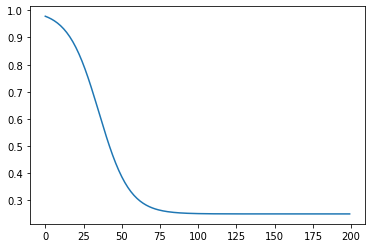

In [15]:
alphas = 1 + (a-1)/(1+np.exp(-k*(ts-a_date)))
plt.plot (alphas)

In [16]:
S_c, E_c, I_c, R_c, I_m, R_m = SEIR_exams (ts, s0, e0, i0, r0, beta, sigma, gamma, a_date, k, a)


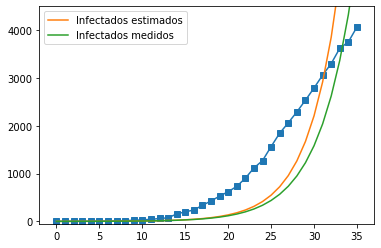

In [17]:
plt.plot(df.Infectados_Actuales, marker = "s")
plt.plot(I_c, label = "Infectados estimados")
plt.plot (I_m, label = "Infectados medidos")
plt.xlim((-2, 37))
plt.ylim((-50, 4500))
plt.legend()

# SCRAPBOOK

In [13]:
from scipy.optimize import curve_fit

In [22]:
def SEIR_exams_opt_func (ts, beta, sigma, gamma, a_date, k, a):
    S_c, E_c, I_c, R_c, I_m, R_m = SEIR_exams (ts, s0, e0, i0, r0, beta, sigma, gamma, a_date, k, a)
    return np.concatenate((I_m, R_m)).flatten()

In [48]:
popt, pcov = curve_fit(SEIR_exams_opt_func, t_data, np.concatenate((I_real, R_real)).flatten(), 
                       p0 = [beta, sigma, gamma, a_date, k, a],
                       maxfev=5000, 
                       bounds = ([1e-10, 1./21, 1./28, t_data[0], 0, 0], [1e-3, 1./3, 1./3., 500, 1., 1]))

In [49]:
popt

array([5.61278602e-08, 2.85847215e-01, 4.20657782e-02, 2.68954740e+01,
       3.87830961e-01, 3.33449100e-02])

In [50]:
print (beta, sigma, gamma, a_date, k, a)

1e-07 0.08333333333333333 0.05 35.0 0.1 0.25


In [51]:
beta_o, sigma_o, gamma_o, a_date_o, k_o, a_o = popt

In [52]:
print (beta_o, 1./sigma_o, 1./gamma_o)

5.612786016204987e-08 3.498372373511361 23.77229291720034


In [53]:
S_o, E_o, I_o, R_o, I_mo, R_mo = SEIR_exams (ts, s0, e0, i0, r0, beta_o, sigma_o, gamma_o, a_date_o, k_o, a_o)


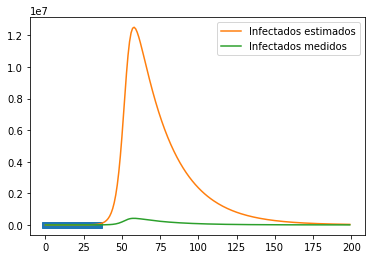

In [59]:
plt.plot(df.Infectados_Actuales, marker = "s")
plt.plot(I_o, label = "Infectados estimados")
plt.plot (I_mo, label = "Infectados medidos")

#plt.xlim((-2, 37))
#plt.ylim((-50, 4500))
#plt.ylim((-50, 1e6))
plt.legend()

In [64]:
#i_ini = len(i_data) - len(I_real)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(I_o), dtype = float)])

Text(0.5, 0.1, 'Los datos actuales tienen varias deficiencias las cuales se traspasan a los modelos y resultados.\nEn ese sentido estos modelos están lejos de ser exactos, pero sirven para estudiar tendencias generales.\n@CabreraVives')

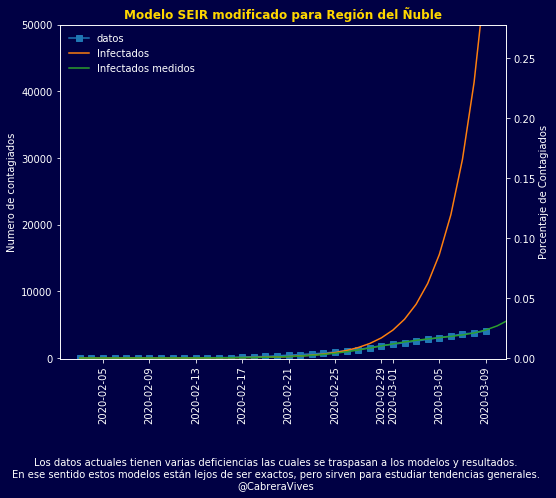

In [71]:
backg_c = "#000044"

fig, ax1 = plt.subplots(figsize = (8, 8))

fig.patch.set_facecolor(backg_c)
fig.subplots_adjust(bottom = 0.3)

plt.plot(x_plot_data, df.Infectados_Actuales, marker = "s", label = "datos")
xlims = ax1.get_xlim()
plt.plot(x_plot_proy, I_o, label = "Infectados")
plt.plot (x_plot_proy, I_mo, label = "Infectados medidos")
#plt.xticks(rotation = 90)
plt.xlim(xlims)
plt.ylim((-100, 50000))

plt.ylabel ("Numero de contagiados", color = "white")
plt.xticks (rotation = 90, color = "white")
plt.yticks (color = "white")
plt.title ("Modelo SEIR modificado para Región del Ñuble", color = "gold", weight = "bold")

leg = plt.legend(framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')
    
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados", color = "white")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)

axs = fig.axes
for ax in axs:
    ax.set_facecolor(backg_c)
    ax.tick_params(axis='x', rotation = 90)
    ax.tick_params(colors = "white")
    for sp in ax.spines:
        ax.spines[sp].set_color("white")
        
caption = "Los datos actuales tienen varias deficiencias las cuales se traspasan a los modelos y resultados.\nEn ese sentido estos modelos están lejos de ser exactos, pero sirven para estudiar tendencias generales.\n@CabreraVives"
fig.text(0.5, 0.1, caption, ha='center', va='center', color = "white")


//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.1, 'Los datos actuales tienen varias deficiencias las cuales se traspasan a los modelos y resultados.\nEn ese sentido estos modelos están lejos de ser exactos, pero sirven para estudiar tendencias generales.\n@CabreraVives')

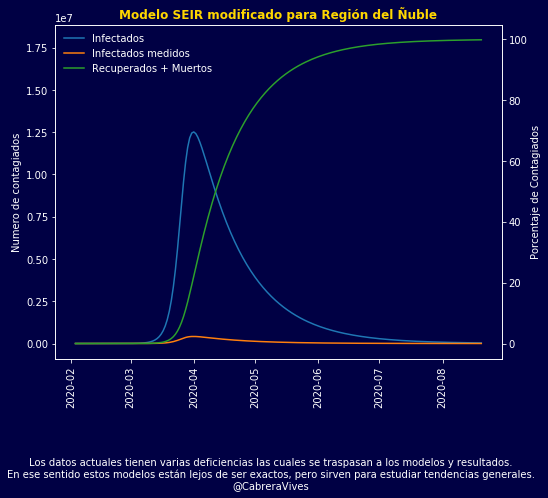

In [65]:
backg_c = "#000044"

fig, ax1 = plt.subplots(figsize = (8, 8))

fig.patch.set_facecolor(backg_c)
fig.subplots_adjust(bottom = 0.3)

#plt.plot(x_plot, df.Infectados_Actuales, marker = "s", label = "datos")
#xlims = ax1.get_xlim()
plt.plot(x_plot_proy, I_o, label = "Infectados")
plt.plot (x_plot_proy, I_mo, label = "Infectados medidos")
plt.plot (x_plot_proy, R_o, label = "Recuperados + Muertos")
#plt.xticks(rotation = 90)
#plt.xlim(xlims)
#plt.ylim((0, 500))

plt.ylabel ("Numero de contagiados", color = "white")
plt.xticks (rotation = 90, color = "white")
plt.yticks (color = "white")
plt.title ("Modelo SEIR modificado para Región del Ñuble", color = "gold", weight = "bold")

leg = plt.legend(framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')
    
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados", color = "white")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)

axs = fig.axes
for ax in axs:
    ax.set_facecolor(backg_c)
    ax.tick_params(axis='x', rotation = 90)
    ax.tick_params(colors = "white")
    for sp in ax.spines:
        ax.spines[sp].set_color("white")
        
caption = "Los datos actuales tienen varias deficiencias las cuales se traspasan a los modelos y resultados.\nEn ese sentido estos modelos están lejos de ser exactos, pero sirven para estudiar tendencias generales.\n@CabreraVives"
fig.text(0.5, 0.1, caption, ha='center', va='center', color = "white")

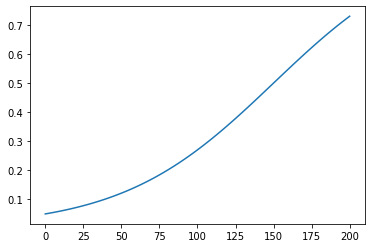

In [2]:
k = 0.02
alpha0 = 150
x = np.linspace (0, 200, 100)
y = sigmoid(x, alpha0, k, b = 0)


plt.plot(x, y)

In [3]:

#We define alpha as: 
I_alpha =i_data/i_c
#where i_data the real data and i_c is the infected evaluated by the SEIR model with respect to time (Days)
#Now we fit I_alpha as a sigmoid function



popt, pcov = curve_fit(sigmoid, x_times, I_alpha, p0, method='dogbox')
#x_times son los datos reales, las fechas
x = np.linspace(0, 30, 19)
alpha = sigmoid(x, *popt)

I = i_c/alpha
print(p0)
print("popt",popt )
plt.plot(x_times,i_data , 'o', label='data')
#alpha no se nota si se plotea con los otros plot, pero si se plotea sola se nota que es un sigmoide
#plt.plot(x,alpha,'-', label='Alpha')
plt.plot(x_times, i_c, label='SEIR')
plt.plot(x_times, I, label='Real')
plt.legend()
plt.show()

NameError: name 'i_data' is not defined

In [12]:
beta = 1e-07
sigma = 1/14.5 
gamma = 1./12.0

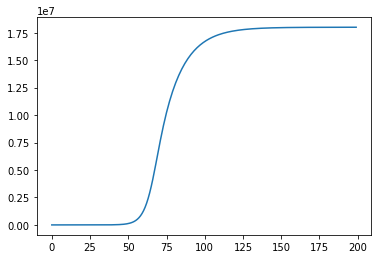

In [46]:
pop = 1.8e7
i0 = 1
e0 = 0
r0 = 0
s0 = pop - i0 - r0 - e0

ts = np.arange (0, 200, 1)
s_c, e_c, i_c, r_c = SEIR_forward(ts, s0, e0, i0, r0, beta, sigma, gamma)

plt.plot (ts, i_c+r_c)


In [183]:
alpha0 = 10000
k = 1e-4
Ex = 5000.
dI = i_c[1:] - i_c[:-1] + r_c[1:] - r_c[:-1]
alpha = (1./(1+np.exp(-(dI-alpha0)*k)))
dIe = Ex*alpha




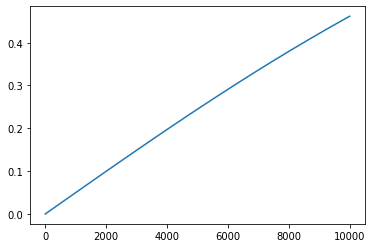

In [184]:
dIs = np.arange(0, 1e4, 10)
alphas = (1./(1+np.exp(-(dIs)*k)))*2 - 1
plt.plot(dIs, alphas)

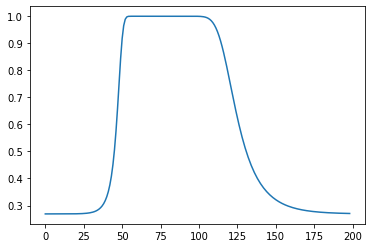

In [185]:
plt.plot(alpha)

(-100, 5100.0)

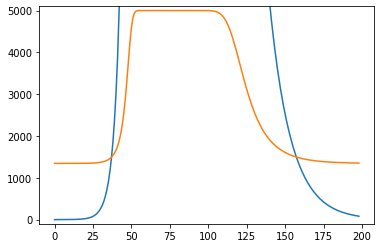

In [190]:
plt.plot(dI)
plt.plot(dIe)
#plt.yscale("log")
plt.ylim((-100, Ex + 100))
#plt.ylim((-10, 50))
#plt.xlim((0, 100))
#plt.axhline(alpha0)
#plt.axhline(alpha0/2)



In [178]:
S_c, E_c, I_c, R_c, I_m = SEIR_exams (ts, s0, e0, i0, r0, beta, sigma, gamma, alpha0, k)


(0, 500)

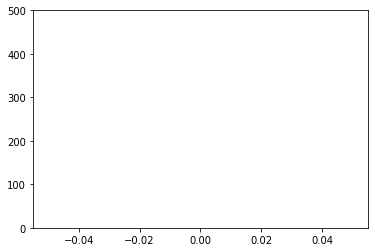

In [17]:
#plt.plot(I_c)
plt.plot(I_m, ls = "--")
plt.ylim ((0, 500))